In [1]:
#Import the necessary libraries and read the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from datetime import datetime
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
fifa=pd.read_csv('fifa.csv')
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
#Drop any columns that you deem unecessary for analysis.
fifa.drop(['Photo','Flag','ID','Club Logo','Loaned From','Jersey Number','Nationality','Club','Preferred Foot',
          'Weak Foot','Skill Moves','Work Rate','Body Type','Crossing','Finishing','HeadingAccuracy',
          'ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl',
          'Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina',
          'Strength','LongShots','Aggression','Interceptions','Vision','Penalties','Composure','Marking',
          'StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'],
          axis=1,inplace=True)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Value                     18207 non-null  object 
 5   Wage                      18207 non-null  object 
 6   International Reputation  18159 non-null  float64
 7   Position                  18147 non-null  object 
 8   Joined                    16654 non-null  object 
 9   Contract Valid Until      17918 non-null  object 
 10  Height                    18159 non-null  object 
 11  Weight                    18159 non-null  object 
 12  Positioning               18159 non-null  float64
 13  Release Clause            16643 non-null  object 
dtypes: flo

In [4]:
#columns need to be converted for further analysis
fifa['Value']=fifa['Value'].replace(['€','K','M'],'',regex=True).astype(float)
fifa['Value']

0        110.5
1         77.0
2        118.5
3         72.0
4        102.0
         ...  
18202     60.0
18203     60.0
18204     60.0
18205     60.0
18206     60.0
Name: Value, Length: 18207, dtype: float64

In [5]:
fifa['Wage']=fifa['Wage'].replace(['€','K','M'],'',regex=True).astype(float)
fifa['Wage']

0        565.0
1        405.0
2        290.0
3        260.0
4        355.0
         ...  
18202      1.0
18203      1.0
18204      1.0
18205      1.0
18206      1.0
Name: Wage, Length: 18207, dtype: float64

In [6]:
fifa['Joined']=pd.to_datetime(fifa['Joined'])
fifa['Joined']=pd.DatetimeIndex(fifa['Joined']).year
fifa['Joined']

0        2004.0
1        2018.0
2        2017.0
3        2011.0
4        2015.0
          ...  
18202    2017.0
18203    2018.0
18204    2017.0
18205    2018.0
18206    2018.0
Name: Joined, Length: 18207, dtype: float64

In [7]:
fifa['Joined']=pd.to_numeric(fifa['Joined'],errors='coerce').astype('Int64')
fifa['Joined']

0        2004
1        2018
2        2017
3        2011
4        2015
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 18207, dtype: Int64

In [8]:
fifa['Contract Valid Until']=pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [9]:
fifa['Height'].replace("\'",'.',regex=True,inplace=True)
fifa['Height'].astype(float)

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [10]:
fifa['Weight'].replace('lbs','',regex=True,inplace=True)
fifa['Weight'].astype(float)

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [11]:
fifa['Release Clause']=fifa['Release Clause'].replace(['€','K','M'],'',regex=True).astype(float)
fifa['Release Clause']


0        226.5
1        127.1
2        228.1
3        138.6
4        196.4
         ...  
18202    143.0
18203    113.0
18204    165.0
18205    143.0
18206    165.0
Name: Release Clause, Length: 18207, dtype: float64

In [12]:
#Check for missing values and do a mean imputation where necessary.
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Overall                   18207 non-null  int64         
 3   Potential                 18207 non-null  int64         
 4   Value                     18207 non-null  float64       
 5   Wage                      18207 non-null  float64       
 6   International Reputation  18159 non-null  float64       
 7   Position                  18147 non-null  object        
 8   Joined                    16654 non-null  Int64         
 9   Contract Valid Until      17918 non-null  datetime64[ns]
 10  Height                    18159 non-null  object        
 11  Weight                    18159 non-null  object        
 12  Positioning       

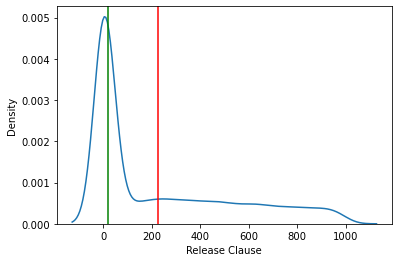

In [84]:
sns.kdeplot(data=fifa,x='Release Clause')
plt.axvline(fifa['Release Clause'].mean(),color='red')
plt.axvline(fifa['Release Clause'].median(),color='green')
plt.show()

In [85]:
#Since Release Clause is rightly skewed so I am going to use median instead of mean 
fifa['Release Clause'].fillna(fifa['Release Clause'].median(),inplace=True)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Overall                   18207 non-null  int64         
 3   Potential                 18207 non-null  int64         
 4   Value                     18207 non-null  float64       
 5   Wage                      18207 non-null  float64       
 6   International Reputation  18207 non-null  float64       
 7   Position                  18147 non-null  object        
 8   Joined                    16654 non-null  Int64         
 9   Contract Valid Until      17918 non-null  datetime64[ns]
 10  Height                    18159 non-null  object        
 11  Weight                    18159 non-null  object        
 12  Positioning       

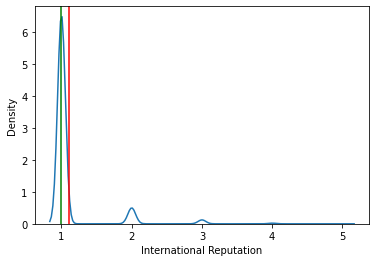

In [13]:
sns.kdeplot(data=fifa,x='International Reputation')
plt.axvline(fifa['International Reputation'].mean(),color='red')
plt.axvline(fifa['International Reputation'].median(),color='green')
plt.show()

In [14]:
 #Since International reputation is rightly skewed so I am going to use median instead of mean 
fifa['International Reputation'].fillna(fifa['International Reputation'].median(),inplace=True)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Overall                   18207 non-null  int64         
 3   Potential                 18207 non-null  int64         
 4   Value                     18207 non-null  float64       
 5   Wage                      18207 non-null  float64       
 6   International Reputation  18207 non-null  float64       
 7   Position                  18147 non-null  object        
 8   Joined                    16654 non-null  Int64         
 9   Contract Valid Until      17918 non-null  datetime64[ns]
 10  Height                    18159 non-null  object        
 11  Weight                    18159 non-null  object        
 12  Positioning       

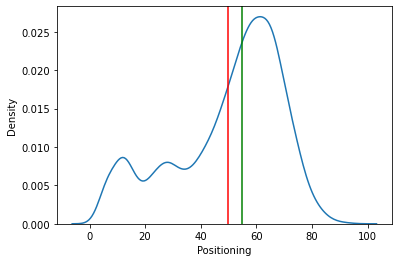

In [15]:
sns.kdeplot(data=fifa,x='Positioning')
plt.axvline(fifa['Positioning'].mean(),color='red')
plt.axvline(fifa['Positioning'].median(),color='green')
plt.show()

In [16]:
#Since Positioning is leftly skewed I am using median
fifa['Positioning'].fillna(fifa['Positioning'].median(),inplace=True)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Overall                   18207 non-null  int64         
 3   Potential                 18207 non-null  int64         
 4   Value                     18207 non-null  float64       
 5   Wage                      18207 non-null  float64       
 6   International Reputation  18207 non-null  float64       
 7   Position                  18147 non-null  object        
 8   Joined                    16654 non-null  Int64         
 9   Contract Valid Until      17918 non-null  datetime64[ns]
 10  Height                    18159 non-null  object        
 11  Weight                    18159 non-null  object        
 12  Positioning       

# Exploratory Analysis:

In [17]:
#Plot the distribution of Overall rating for all players. 

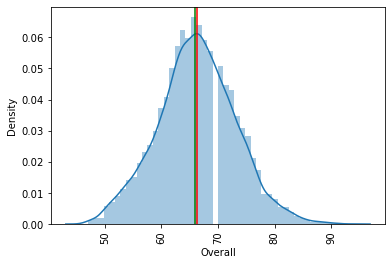

In [86]:
sns.distplot(fifa['Overall'],kde=True)
plt.axvline(fifa['Overall'].mean(),color='red')
plt.axvline(fifa['Overall'].median(),color='green')
plt.xticks(rotation=90)
plt.show()

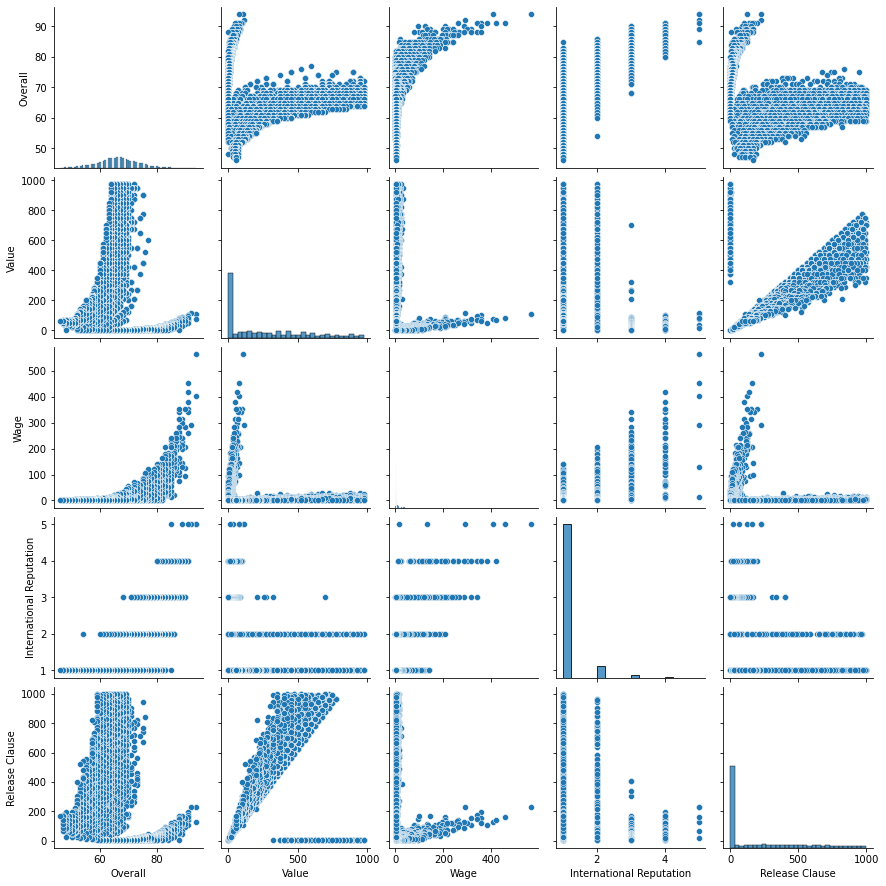

In [19]:
#2.Generate pair plots for the following variables:
#Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
ffa=fifa[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']]
sns.pairplot(ffa)
plt.show()

In [20]:
#3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
fifa.columns
fifa1=fifa[fifa['Contract Valid Until']=='2020']
fifa1['Overall_Rank']=fifa1.Overall.rank(method='first',ascending=False)
ff=fifa1.head(20)
ff.head()

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,Overall_Rank
3,De Gea,27,91,93,72.0,260.0,4.0,GK,2011,2020-01-01,6.4,168,12.0,138.6,1.0
5,E. Hazard,27,91,91,93.0,340.0,4.0,LF,2012,2020-01-01,5.8,163,87.0,172.1,2.0
6,L. Modrić,32,91,91,67.0,420.0,4.0,RCM,2012,2020-01-01,5.8,146,79.0,137.4,3.0
8,Sergio Ramos,32,91,91,51.0,380.0,4.0,RCB,2005,2020-01-01,6.0,181,60.0,104.6,4.0
13,David Silva,32,90,90,60.0,285.0,4.0,LCM,2010,2020-01-01,5.8,148,89.0,111.0,5.0


In [21]:
#a)What would the average wage for this set of players be?
ff['Wage'].mean()

205.15

In [22]:
#b)What is the average age?
ff['Age'].mean()

29.95

In [23]:
#c)Is there a correlation between the Overall rating and Value for these players?
ff[['Overall','Value']].corr()

,Overall,Value
Overall,1.000000,0.666788
Value,0.666788,1.000000


In [24]:
#4.Generate tables containing the top 5 players by Overall rating for each unique position.
fifa['Position'].unique()


array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [25]:
RF=fifa[fifa['Position']=='RF']
RF['rank']=RF.Overall.rank(method='first',ascending=False)
RF=RF.head(5)
RF

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
0,L. Messi,31,94,94,110.5,565.0,5.0,RF,2004,2021-01-01,5.7,159,94.0,226.5,1.0
50,D. Mertens,31,87,87,45.0,135.0,3.0,RF,2013,2020-01-01,5.7,134,87.0,76.5,2.0
528,D. Valeri,32,80,80,11.5,12.0,2.0,RF,2013,2018-01-01,5.10,165,84.0,17.3,3.0
890,L. Podolski,33,78,78,6.5,11.0,3.0,RF,2017,2019-01-01,6.0,183,75.0,8.1,4.0
1774,C. Ciano,28,75,75,6.5,17.0,1.0,RF,2017,2021-01-01,5.9,161,67.0,11.7,5.0


In [26]:
ST=fifa[fifa['Position']=='ST']
ST['rank']=ST.Overall.rank(method='first',ascending=False)
ST=ST.head(5)
ST

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
1,Cristiano Ronaldo,33,94,94,77.0,405.0,5.0,ST,2018,2022-01-01,6.2,183,95.0,127.1,1.0
10,R. Lewandowski,29,90,90,77.0,205.0,4.0,ST,2014,2021-01-01,6.0,176,91.0,127.1,2.0
16,H. Kane,24,89,91,83.5,205.0,3.0,ST,2010,2024-01-01,6.2,196,93.0,160.7,3.0
23,S. Agüero,30,89,89,64.5,300.0,4.0,ST,2011,2021-01-01,5.8,154,92.0,119.3,4.0
36,G. Bale,28,88,88,60.0,355.0,4.0,ST,2013,2022-01-01,6.1,181,85.0,123.0,5.0


In [27]:
LW=fifa[fifa['Position']=='LW']
LW['rank']=LW.Overall.rank(method='first',ascending=False)
LW=LW.head(5)
LW

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
2,Neymar Jr,26,92,93,118.5,290.0,5.0,LW,2017,2022-01-01,5.9,150,89.0,228.1,1.0
29,L. Insigne,27,88,88,62.0,165.0,3.0,LW,2010,2022-01-01,5.4,130,83.0,105.4,2.0
30,Isco,26,88,91,73.5,315.0,3.0,LW,2013,2022-01-01,5.9,174,78.0,156.2,3.0
32,Coutinho,26,88,89,69.5,340.0,3.0,LW,2018,2023-01-01,5.8,150,84.0,147.7,4.0
55,L. Sané,22,86,92,61.0,195.0,2.0,LW,2016,2021-01-01,6.0,165,84.0,125.1,5.0


In [28]:
GK=fifa[fifa['Position']=='GK']
GK['rank']=GK.Overall.rank(method='first',ascending=False)
GK=GK.head(5)
GK

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
3,De Gea,27,91,93,72.0,260.0,4.0,GK,2011,2020-01-01,6.4,168,12.0,138.6,1.0
9,J. Oblak,25,90,93,68.0,94.0,3.0,GK,2014,2021-01-01,6.2,192,11.0,144.5,2.0
18,M. ter Stegen,26,89,92,58.0,240.0,3.0,GK,2014,2022-01-01,6.2,187,11.0,123.3,3.0
19,T. Courtois,26,89,90,53.5,240.0,4.0,GK,2018,2024-01-01,6.6,212,13.0,113.7,4.0
22,M. Neuer,32,89,89,38.0,130.0,5.0,GK,2011,2021-01-01,6.4,203,12.0,62.7,5.0


In [29]:
RCM=fifa[fifa['Position']=='RCM']
RCM['rank']=RCM.Overall.rank(method='first',ascending=False)
RCM=RCM.head(5)
RCM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
4,K. De Bruyne,27,91,92,102.0,355.0,4.0,RCM,2015,2023-01-01,5.11,154,87.0,196.4,1.0
6,L. Modrić,32,91,91,67.0,420.0,4.0,RCM,2012,2020-01-01,5.8,146,79.0,137.4,2.0
53,I. Rakitić,30,87,87,46.5,260.0,4.0,RCM,2014,2021-01-01,6.0,172,79.0,95.3,3.0
82,J. Kimmich,23,85,88,40.5,92.0,3.0,RCM,2015,2023-01-01,5.9,154,80.0,69.9,4.0
83,Saúl,23,85,90,50.5,77.0,3.0,RCM,2013,2026-01-01,6.0,170,82.0,107.3,5.0


In [30]:
LF=fifa[fifa['Position']=='LF']
LF['rank']=LF.Overall.rank(method='first',ascending=False)
LF=LF.head(5)
LF

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
5,E. Hazard,27,91,91,93.0,340.0,4.0,LF,2012,2020-01-01,5.8,163,87.0,172.1,1.0
15,P. Dybala,24,89,94,89.0,205.0,3.0,LF,2015,2022-01-01,5.10,165,84.0,153.5,2.0
76,Iniesta,34,86,86,21.5,21.0,4.0,LF,2018,2021-01-01,5.7,150,81.0,26.9,3.0
272,Jonathan Viera,28,82,82,22.5,31.0,2.0,LF,2018,2020-01-01,5.7,141,72.0,49.5,4.0
1379,S. Blanco,30,76,76,7.5,9.0,1.0,LF,2017,2018-01-01,5.6,141,71.0,11.3,5.0


In [31]:
RS=fifa[fifa['Position']=='RS']
RS['rank']=RS.Overall.rank(method='first',ascending=False)
RS=RS.head(5)
RS

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
7,L. Suárez,31,91,91,80.0,455.0,5.0,RS,2014,2021-01-01,6.0,190,92.0,164.0,1.0
109,Z. Ibrahimović,36,85,85,14.0,15.0,5.0,RS,2018,2022-01-01,6.5,209,85.0,21.0,2.0
148,Falcao,32,84,84,25.0,115.0,3.0,RS,2013,2020-01-01,5.10,159,88.0,47.5,3.0
267,W. Ben Yedder,27,82,82,23.5,28.0,2.0,RS,2016,2021-01-01,5.7,150,87.0,49.4,4.0
357,S. Zaza,27,81,82,21.0,48.0,2.0,RS,<NA>,2019-06-30,6.1,185,83.0,NaN,5.0


In [32]:
RCB=fifa[fifa['Position']=='RCB']
RCB['rank']=RCB.Overall.rank(method='first',ascending=False)
RCB=RCB.head(5)
RCB

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
8,Sergio Ramos,32,91,91,51.0,380.0,4.0,RCB,2005,2020-01-01,6.0,181,60.0,104.6,1.0
39,Thiago Silva,33,88,88,24.0,165.0,4.0,RCB,2012,2020-01-01,6.0,181,59.0,44.4,2.0
54,Piqué,31,87,87,34.0,240.0,4.0,RCB,2008,2022-01-01,6.4,187,58.0,69.7,3.0
62,R. Varane,25,86,91,50.0,210.0,3.0,RCB,2011,2022-01-01,6.3,179,44.0,106.3,4.0
70,L. Bonucci,31,86,86,30.0,160.0,3.0,RCB,2018,2023-01-01,6.3,187,38.0,49.5,5.0


In [33]:
LCM=fifa[fifa['Position']=='LCM']
LCM['rank']=LCM.Overall.rank(method='first',ascending=False)
LCM=LCM.head(5)
LCM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
11,T. Kroos,28,90,90,76.5,355.0,4.0,LCM,2014,2022-01-01,6.0,168,79.0,156.8,1.0
13,David Silva,32,90,90,60.0,285.0,4.0,LCM,2010,2020-01-01,5.8,148,89.0,111.0,2.0
52,M. Hamšík,30,87,87,46.5,125.0,3.0,LCM,2007,2020-01-01,6.0,174,88.0,79.1,3.0
63,M. Verratti,25,86,89,55.0,135.0,3.0,LCM,2012,2021-01-01,5.5,132,71.0,105.9,4.0
114,Bruno Fernandes,23,84,88,40.5,22.0,2.0,LCM,2017,2023-01-01,5.10,152,79.0,84.0,5.0


In [34]:
CB=fifa[fifa['Position']=='CB']
CB['rank']=CB.Overall.rank(method='first',ascending=False)
CB=CB.head(5)
CB

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
12,D. Godín,32,90,90,44.0,125.0,3.0,CB,2010,2019-01-01,6.2,172,48.0,90.2,1.0
42,S. Umtiti,24,87,92,57.0,205.0,3.0,CB,2016,2023-01-01,6.0,165,58.0,121.1,2.0
73,M. Benatia,31,86,86,30.0,160.0,3.0,CB,2014,2020-01-01,6.2,207,38.0,49.5,3.0
89,N. Otamendi,30,85,85,28.5,170.0,3.0,CB,2015,2022-01-01,6.0,179,51.0,52.7,4.0
102,Naldo,35,85,85,9.0,38.0,3.0,CB,2016,2020-01-01,6.6,201,53.0,15.3,5.0


In [35]:
LDM=fifa[fifa['Position']=='LDM']
LDM['rank']=LDM.Overall.rank(method='first',ascending=False)
LDM=LDM.head(5)
LDM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
14,N. Kanté,27,89,90,63.0,225.0,3.0,LDM,2016,2023-01-01,5.6,159,71.0,121.3,1.0
91,Paulinho,29,85,85,37.0,235.0,3.0,LDM,<NA>,2019-06-30,6.0,157,84.0,NaN,2.0
119,Marquinhos,24,84,89,35.5,90.0,3.0,LDM,2013,2022-01-01,6.0,165,46.0,68.3,3.0
217,Lucas Leiva,31,83,83,17.5,64.0,3.0,LDM,2017,2020-01-01,5.10,172,66.0,29.8,4.0
323,F. de Jong,21,81,89,26.0,19.0,1.0,LDM,2015,2022-01-01,5.11,154,63.0,41.6,5.0


In [36]:
CAM=fifa[fifa['Position']=='CAM']
CAM['rank']=CAM.Overall.rank(method='first',ascending=False)
CAM=CAM.head(5)
CAM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
17,A. Griezmann,27,89,90,78.0,145.0,4.0,CAM,2014,2023-01-01,5.9,161,91.0,165.8,1.0
31,C. Eriksen,26,88,91,73.5,205.0,3.0,CAM,2013,2020-01-01,5.11,168,83.0,141.5,2.0
61,Roberto Firmino,26,86,87,53.0,195.0,3.0,CAM,2015,2023-01-01,5.11,168,87.0,104.7,3.0
66,T. Müller,28,86,86,45.0,135.0,4.0,CAM,2008,2021-01-01,6.1,165,92.0,74.3,4.0
74,M. Özil,29,86,86,43.5,190.0,4.0,CAM,2013,2021-01-01,5.11,168,83.0,82.7,5.0


In [37]:
CDM=fifa[fifa['Position']=='CDM']
CDM['rank']=CDM.Overall.rank(method='first',ascending=False)
CDM=CDM.head(5)
CDM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
20,Sergio Busquets,29,89,89,51.5,315.0,4.0,CDM,2008,2023-01-01,6.2,168,77.0,105.6,1.0
27,Casemiro,26,88,90,59.5,285.0,3.0,CDM,2013,2021-01-01,6.1,185,69.0,126.4,2.0
72,M. Pjanić,28,86,86,44.0,180.0,3.0,CDM,2016,2023-01-01,5.10,159,70.0,72.6,3.0
75,Fernandinho,33,86,86,18.0,185.0,3.0,CDM,2013,2020-01-01,5.10,148,70.0,33.3,4.0
118,Fabinho,24,84,88,34.0,120.0,3.0,CDM,2018,2023-01-01,6.2,172,70.0,67.2,5.0


In [38]:
LS=fifa[fifa['Position']=='LS']
LS['rank']=LS.Overall.rank(method='first',ascending=False)
LS=LS.head(5)
LS

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
21,E. Cavani,31,89,89,60.0,200.0,4.0,LS,2013,2020-01-01,6.1,170,93.0,111.0,1.0
38,G. Higuaín,30,88,88,57.0,245.0,4.0,LS,<NA>,2019-06-30,6.1,196,92.0,NaN,2.0
100,Diego Costa,29,85,85,38.5,100.0,4.0,LS,2018,2021-01-01,6.2,190,87.0,78.9,3.0
151,A. Gómez,30,84,84,30.0,53.0,3.0,LS,2014,2022-01-01,5.5,150,81.0,51.0,4.0
174,Gerard Moreno,26,83,85,32.0,53.0,1.0,LS,2018,2023-01-01,5.11,170,83.0,69.6,5.0


In [39]:
LCB=fifa[fifa['Position']=='LCB']
LCB['rank']=LCB.Overall.rank(method='first',ascending=False)
LCB=LCB.head(5)
LCB

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
24,G. Chiellini,33,89,89,27.0,215.0,4.0,LCB,2005,2020-01-01,6.2,187,28.0,44.6,1.0
34,M. Hummels,29,88,88,46.0,160.0,4.0,LCB,2016,2021-01-01,6.3,203,56.0,75.9,2.0
44,K. Koulibaly,27,87,90,51.0,115.0,3.0,LCB,2014,2021-01-01,6.2,196,24.0,90.5,3.0
51,J. Vertonghen,31,87,87,34.0,155.0,3.0,LCB,2012,2019-01-01,6.2,190,60.0,62.9,4.0
59,V. van Dijk,26,86,88,44.5,165.0,3.0,LCB,2018,2023-01-01,6.4,203,41.0,87.9,5.0


In [40]:
RM=fifa[fifa['Position']=='RM']
RM['rank']=RM.Overall.rank(method='first',ascending=False)
RM=RM.head(5)
RM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
25,K. Mbappé,19,88,95,81.0,100.0,3.0,RM,2018,2022-01-01,5.10,161,88.0,166.1,1.0
26,M. Salah,26,88,89,69.5,255.0,3.0,RM,2017,2023-01-01,5.9,157,90.0,137.3,2.0
122,F. Thauvin,25,84,87,39.0,72.0,2.0,RM,2017,2021-01-01,5.10,154,83.0,77.0,3.0
137,José Callejón,31,84,84,27.5,105.0,3.0,RM,2013,2020-01-01,5.10,161,88.0,46.8,4.0
138,A. Di María,30,84,84,29.5,125.0,4.0,RM,2015,2021-01-01,5.11,152,82.0,54.6,5.0


In [41]:
LAM=fifa[fifa['Position']=='LAM']
LAM['rank']=LAM.Overall.rank(method='first',ascending=False)
LAM=LAM.head(5)
LAM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
28,J. Rodríguez,26,88,89,69.5,315.0,4.0,LAM,<NA>,2019-06-30,5.11,172,80.0,NaN,1.0
365,D. Tadić,29,81,81,17.5,26.0,3.0,LAM,2018,2022-01-01,5.11,168,75.0,24.5,2.0
1587,Fabrio Farinha,26,75,75,7.0,31.0,1.0,LAM,2018,2021-01-01,5.10,159,67.0,13.3,3.0
2247,Leo Caldeirinha,34,74,74,2.8,13.0,1.0,LAM,2018,2021-01-01,5.9,165,72.0,5.4,4.0
2342,Nicolás Formido,30,74,74,5.5,23.0,1.0,LAM,2018,2021-01-01,6.0,170,73.0,10.5,5.0


In [42]:
LM=fifa[fifa['Position']=='LM']
LM['rank']=LM.Overall.rank(method='first',ascending=False)
LM=LM.head(5)
LM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
33,P. Aubameyang,29,88,88,59.0,265.0,3.0,LM,2018,2021-01-01,6.2,176,90.0,112.1,1.0
58,S. Mané,26,86,87,52.0,195.0,3.0,LM,2016,2023-01-01,5.9,152,87.0,102.7,2.0
65,Douglas Costa,27,86,86,46.5,175.0,3.0,LM,2018,2022-01-01,5.8,154,76.0,76.7,3.0
68,M. Reus,29,86,86,43.5,100.0,4.0,LM,2012,2023-01-01,5.11,157,88.0,74.0,4.0
86,Koke,26,85,86,45.0,88.0,3.0,LM,2011,2019-01-01,5.9,163,84.0,95.6,5.0


In [43]:
LB=fifa[fifa['Position']=='LB']
LB['rank']=LB.Overall.rank(method='first',ascending=False)
LB=LB.head(5)
LB

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
35,Marcelo,30,88,88,43.0,285.0,4.0,LB,2007,2022-01-01,5.9,176,85.0,88.2,1.0
49,Jordi Alba,29,87,87,38.0,250.0,3.0,LB,2012,2020-01-01,5.7,150,79.0,77.9,2.0
64,Alex Sandro,27,86,86,36.5,160.0,3.0,LB,2015,2020-01-01,5.11,176,70.0,60.2,3.0
85,D. Alaba,26,85,87,38.0,110.0,4.0,LB,2010,2021-01-01,5.11,168,76.0,65.6,4.0
106,Filipe Luís,32,85,85,21.5,81.0,3.0,LB,2015,2019-01-01,6.0,163,71.0,44.1,5.0


In [44]:
RDM=fifa[fifa['Position']=='RDM']
RDM['rank']=RDM.Overall.rank(method='first',ascending=False)
RDM=RDM.head(5)
RDM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
45,P. Pogba,25,87,91,64.0,210.0,4.0,RDM,2016,2021-01-01,6.4,185,81.0,123.2,1.0
134,Illarramendi,28,84,84,31.0,51.0,2.0,RDM,2015,2023-01-01,5.10,165,79.0,65.1,2.0
198,I. Gueye,28,83,83,21.0,125.0,2.0,RDM,2016,2022-01-01,5.9,146,67.0,39.9,3.0
223,D. De Rossi,34,83,83,8.0,80.0,3.0,RDM,2002,2019-01-01,6.0,183,55.0,13.6,4.0
298,M. Parolo,33,82,82,9.0,59.0,2.0,RDM,2014,2020-01-01,6.0,165,82.0,15.3,5.0


In [45]:
RW=fifa[fifa['Position']=='RW']
RW['rank']=RW.Overall.rank(method='first',ascending=False)
RW=RW.head(5)
RW

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
56,Bernardo Silva,23,86,91,59.5,180.0,2.0,RW,2017,2022-01-01,5.8,141,83.0,114.5,1.0
60,R. Sterling,23,86,89,56.5,195.0,3.0,RW,2015,2023-01-01,5.7,152,87.0,108.8,2.0
79,Marco Asensio,22,85,92,54.0,215.0,3.0,RW,2015,2023-01-01,6.0,168,82.0,121.5,3.0
84,R. Mahrez,27,85,85,40.5,205.0,3.0,RW,2018,2023-01-01,5.10,148,80.0,74.9,4.0
93,A. Sánchez,29,85,85,37.5,215.0,4.0,RW,2018,2022-01-01,5.7,163,84.0,69.4,5.0


In [46]:
CM=fifa[fifa['Position']=='CM']
CM['rank']=CM.Overall.rank(method='first',ascending=False)
CM=CM.head(5)
CM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
67,Thiago,27,86,86,45.5,130.0,3.0,CM,2013,2021-01-01,5.9,154,79.0,75.1,1.0
78,S. Milinković-Savić,23,85,90,50.5,73.0,2.0,CM,2015,2023-01-01,6.3,168,79.0,89.6,2.0
121,Jorginho,26,84,87,38.0,155.0,2.0,CM,2018,2023-01-01,5.11,148,72.0,73.2,3.0
136,I. Gündoğan,27,84,84,32.0,175.0,3.0,CM,2016,2020-01-01,5.11,176,79.0,59.2,4.0
161,N. Keïta,23,83,88,34.0,120.0,2.0,CM,2018,2023-01-01,5.8,141,74.0,67.2,5.0


In [47]:
RB=fifa[fifa['Position']=='RB']
RB['rank']=RB.Overall.rank(method='first',ascending=False)
RB=RB.head(5)
RB

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
69,Azpilicueta,28,86,86,35.0,175.0,3.0,RB,2012,2022-01-01,5.10,168,62.0,64.8,1.0
123,Carvajal,26,84,87,31.5,185.0,3.0,RB,2013,2022-01-01,5.8,161,61.0,66.9,2.0
135,K. Walker,28,84,84,24.5,165.0,3.0,RB,2017,2022-01-01,6.0,154,67.0,45.3,3.0
192,Sergi Roberto,26,83,86,26.5,170.0,3.0,RB,2013,2022-01-01,5.10,150,69.0,56.3,4.0
216,L. Bender,29,83,83,20.0,82.0,3.0,RB,2009,2021-01-01,6.1,179,69.0,34.0,5.0


In [48]:
RAM=fifa[fifa['Position']=='RAM']
RAM['rank']=RAM.Overall.rank(method='first',ascending=False)
RAM=RAM.head(5)
RAM

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
129,J. Cuadrado,30,84,84,29.5,150.0,3.0,RAM,2015,2020-01-01,5.10,159,78.0,48.7,1.0
171,H. Ziyech,25,83,86,32.5,28.0,3.0,RAM,2016,2021-01-01,5.11,143,75.0,47.9,2.0
1705,Allan Bardinho,26,75,75,7.0,22.0,1.0,RAM,2018,2021-01-01,5.9,159,72.0,13.3,3.0
2242,Jacson Zonta,34,74,74,2.8,13.0,1.0,RAM,2018,2021-01-01,5.11,163,76.0,5.4,4.0
2322,Sebas Couteira,30,74,74,5.5,14.0,1.0,RAM,2018,2021-01-01,5.10,154,74.0,10.5,5.0


In [49]:
CF=fifa[fifa['Position']=='CF']
CF['rank']=CF.Overall.rank(method='first',ascending=False)
CF=CF.head(5)
CF

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
271,Luis Alberto,25,82,85,28.5,67.0,2.0,CF,2016,2022-01-01,6.0,163,81.0,50.6,1.0
293,S. Giovinco,31,82,82,20.0,15.0,2.0,CF,2015,2019-01-01,5.4,134,82.0,30.0,2.0
350,A. Milik,24,81,88,25.5,71.0,3.0,CF,2016,2021-01-01,6.1,172,81.0,48.5,3.0
382,L. Stindl,29,81,81,18.0,43.0,2.0,CF,2015,2021-01-01,5.11,176,84.0,30.6,4.0
407,Raffael,33,81,81,11.0,41.0,2.0,CF,2013,2019-01-01,5.9,152,82.0,18.7,5.0


In [50]:
RWB=fifa[fifa['Position']=='RWB']
RWB['rank']=RWB.Overall.rank(method='first',ascending=False)
RWB=RWB.head(5)
RWB

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
450,M. Ginter,24,80,82,15.5,28.0,2.0,RWB,2017,2021-01-01,6.2,183,55.0,27.5,1.0
465,P. Kadeřábek,26,80,81,14.0,39.0,2.0,RWB,2015,2023-01-01,6.0,179,72.0,24.9,2.0
517,S. Coleman,29,80,80,11.0,97.0,2.0,RWB,2009,2022-01-01,5.10,148,75.0,20.9,3.0
652,D. Caligiuri,30,79,79,9.0,33.0,2.0,RWB,2017,2020-01-01,6.0,176,75.0,15.3,4.0
766,Pablo Maffeo,20,78,86,13.0,24.0,1.0,RWB,2018,2023-01-01,5.8,154,67.0,24.7,5.0


In [51]:
LWB=fifa[fifa['Position']=='LWB']
LWB['rank']=LWB.Overall.rank(method='first',ascending=False)
LWB=LWB.head(5)
LWB

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
474,N. Schulz,25,80,81,14.5,37.0,1.0,LWB,2017,2020-01-01,5.11,172,73.0,25.7,1.0
581,Granell,29,79,79,12.0,37.0,1.0,LWB,2014,2021-01-01,5.9,154,74.0,25.2,2.0
601,Jonny,24,79,83,13.5,43.0,2.0,LWB,<NA>,2019-06-30,5.7,154,53.0,NaN,3.0
605,J. Hector,28,79,79,10.0,26.0,3.0,LWB,2012,2023-01-01,6.1,165,62.0,15.0,4.0
787,J. Mojica,25,78,81,10.5,28.0,1.0,LWB,2018,2022-01-01,6.1,161,69.0,22.8,5.0


In [52]:
#a)Are there any players appearing in more than one Table. Please point out such players
combine=pd.concat(objs=(RF,ST,LW,GK,RCM,LF,RS,RCB,LCM,CB,LDM,CAM,CDM,LS,LCB,RM,LAM,LM,LB,RDM,RW,CM,RB,RAM,CF,RWB,LWB),axis=0
                  ,join='inner')
combine.head(5)

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Position,Joined,Contract Valid Until,Height,Weight,Positioning,Release Clause,rank
0,L. Messi,31,94,94,110.5,565.0,5.0,RF,2004,2021-01-01,5.7,159,94.0,226.5,1.0
50,D. Mertens,31,87,87,45.0,135.0,3.0,RF,2013,2020-01-01,5.7,134,87.0,76.5,2.0
528,D. Valeri,32,80,80,11.5,12.0,2.0,RF,2013,2018-01-01,5.10,165,84.0,17.3,3.0
890,L. Podolski,33,78,78,6.5,11.0,3.0,RF,2017,2019-01-01,6.0,183,75.0,8.1,4.0
1774,C. Ciano,28,75,75,6.5,17.0,1.0,RF,2017,2021-01-01,5.9,161,67.0,11.7,5.0


In [53]:
combine.duplicated(keep=False)
#There are no players who appear in more than one table

0       False
50      False
528     False
890     False
1774    False
        ...  
474     False
581     False
601     False
605     False
787     False
Length: 135, dtype: bool

In [54]:
#b)What is the average wage one can expect to pay for the top 5 in every position?
fifa['Position'].unique()
 

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [55]:
RF['Wage'].mean()

148.0

In [56]:
ST['Wage'].mean()

294.0

In [57]:
LW['Wage'].mean()

261.0

In [58]:
GK['Wage'].mean()

192.8

In [59]:
RCM['Wage'].mean()

240.8

In [60]:
LF['Wage'].mean()

121.2

In [61]:
RS['Wage'].mean()

132.2

In [62]:
RCB['Wage'].mean()

231.0

In [63]:
LCM['Wage'].mean()

184.4

In [64]:
CB['Wage'].mean()

139.6

In [65]:
LDM['Wage'].mean()

126.6

In [66]:
CAM['Wage'].mean()

174.0

In [67]:
CDM['Wage'].mean()

217.0

In [68]:
LS['Wage'].mean()

130.2

In [69]:
LCB['Wage'].mean()

162.0

In [70]:
RM['Wage'].mean()

131.4

In [71]:
LAM['Wage'].mean()

81.6

In [72]:
LM['Wage'].mean()

164.6

In [73]:
LB['Wage'].mean()

177.2

In [74]:
RDM['Wage'].mean()

105.0

In [75]:
RW['Wage'].mean()

202.0

In [76]:
CM['Wage'].mean()

130.6

In [77]:
RB['Wage'].mean()

155.4

In [78]:
RAM['Wage'].mean()

45.4

In [79]:
CF['Wage'].mean()

47.4

In [80]:
RWB['Wage'].mean()

44.2

In [81]:
LWB['Wage'].mean()

34.2